**PROYEK PREDIKSI ANALISIS DIABETES**

Nama: Rafael Siregar<br>
Dicoding e-mail: rafael_siregar@students.polmed.ac.id<br>
username: rafael_siregar 

***Import Library***

In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score, f1_score, recall_score, precision_score,
    roc_auc_score, roc_curve, auc, RocCurveDisplay,
    precision_recall_curve, average_precision_score, PrecisionRecallDisplay,
    make_scorer,mean_squared_error
)

***Load Dataset***

In [593]:
#Melakuakan Load dataset Diabetes dataset.csv
df_dataset = pd.read_csv('dataset.csv')
#Melakukan pengecekan data
df_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***Melakuakn Exploratory Data Analysis - Deskripsi Variabel pada Dataset yang digunakan***

In [594]:
#Melakukan pengecekan missing value
df_dataset.info()
#Mengecek deskripsi Variabel data
df_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***Menangani Missing Values dari Tiap kolom yang ada***

In [595]:
#Cek berapa banyak nilai 0 pada tiap kolom yang ada di dataset
df_dataset.isin([0]).sum()
#menghapus nilai 0 pada kolom Glucose, BloodPressure, SkinThickness, Insulin, BMI
df_dataset = df_dataset.loc[(df_dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] != 0).all(axis=1)]
df_dataset = df_dataset.reset_index(drop=True)
df_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


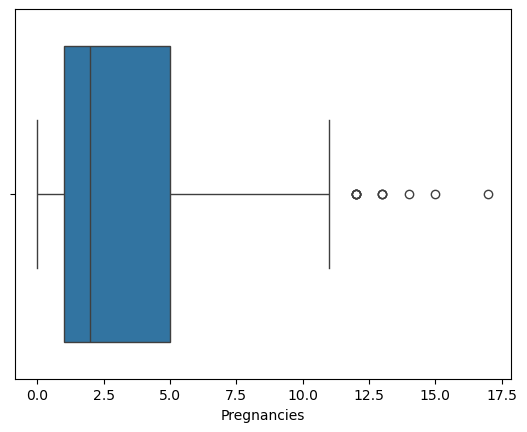

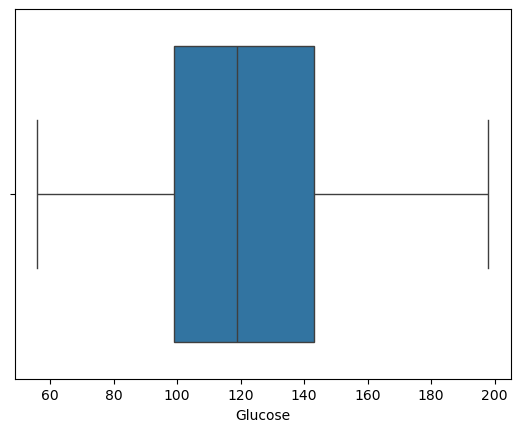

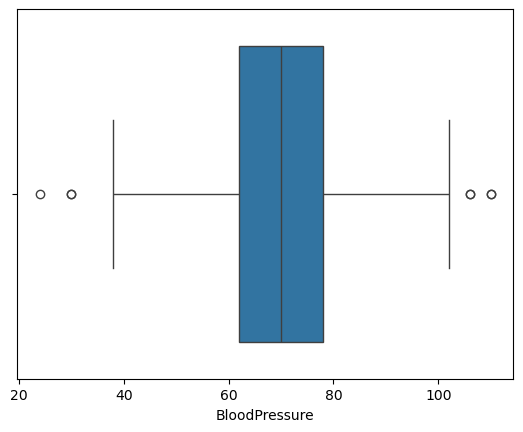

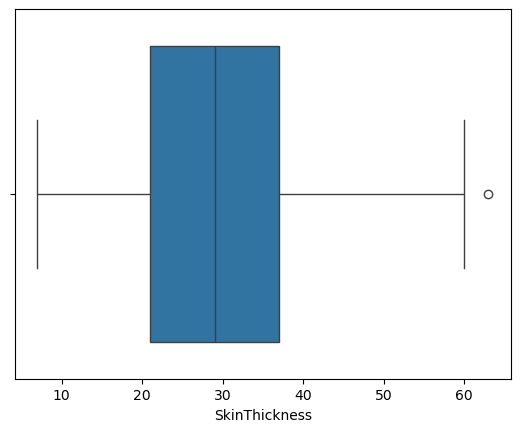

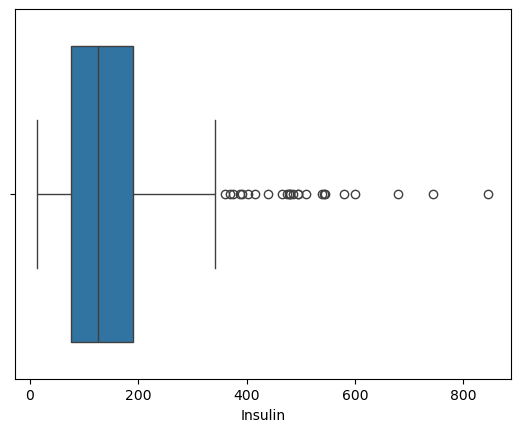

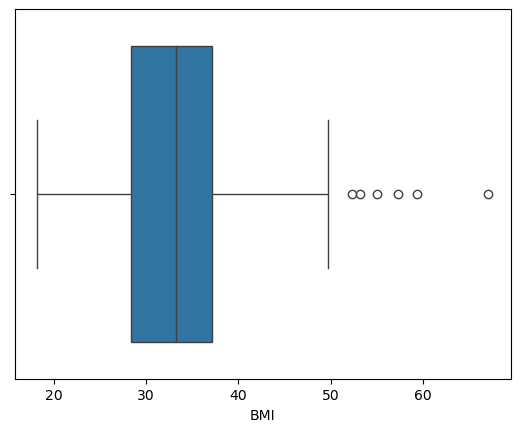

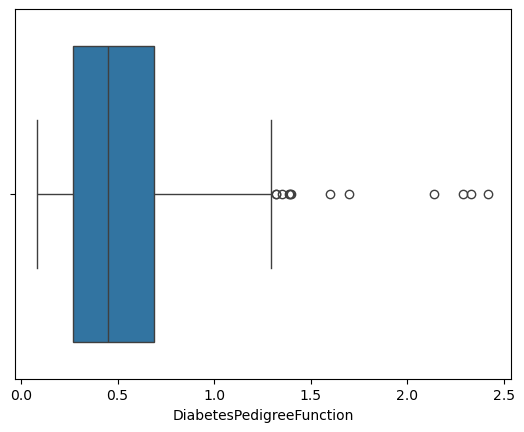

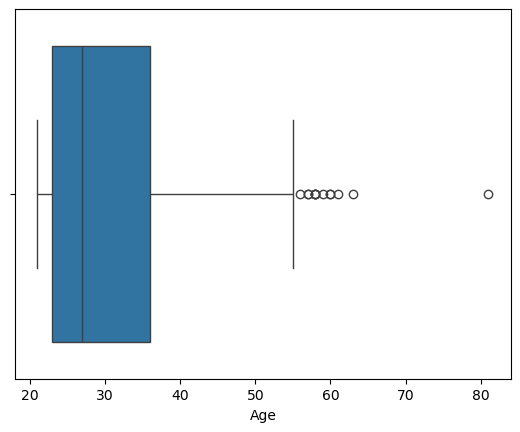

In [596]:
#Menangani Outliers pada dataset kecuali kolom Outcome menggunakan IQR
#visualisasi boxplot untuk mendeteksi outliers pada tiap kolom
sns.boxplot(x=df_dataset['Pregnancies'])
plt.show()
sns.boxplot(x=df_dataset['Glucose'])
plt.show()
sns.boxplot(x=df_dataset['BloodPressure'])
plt.show()
sns.boxplot(x=df_dataset['SkinThickness'])
plt.show()
sns.boxplot(x=df_dataset['Insulin'])
plt.show()
sns.boxplot(x=df_dataset['BMI'])
plt.show()
sns.boxplot(x=df_dataset['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(x=df_dataset['Age'])
plt.show()

In [597]:
#Menerapkan IQR untuk menghilangkan outliers 
numeric_columns = df_dataset.select_dtypes(include=[np.number]).columns
#hitung Q1 dan Q3 dan IQR pada kolom numerik
Q1 = df_dataset[numeric_columns].quantile(0.25)
Q3 = df_dataset[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
#Membuat Filter untuk menghapus baris yang mengandung outliers di kolom numerik
filters_outliers = ~((df_dataset[numeric_columns] < (Q1 - 1.5 * IQR)) | 
                     (df_dataset[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
#Terapkan filter ke dataset asli
df_dataset = df_dataset[filters_outliers]
#cek ukuran dataset setelah menghapus outliers
df_dataset = df_dataset.reset_index(drop=True)
df_dataset.shape
df_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,3,78,50,32,88,31.0,0.248,26,1
2,5,166,72,19,175,25.8,0.587,51,1
3,0,118,84,47,230,45.8,0.551,31,1
4,1,115,70,30,96,34.6,0.529,32,1


***Univariate Analysis***

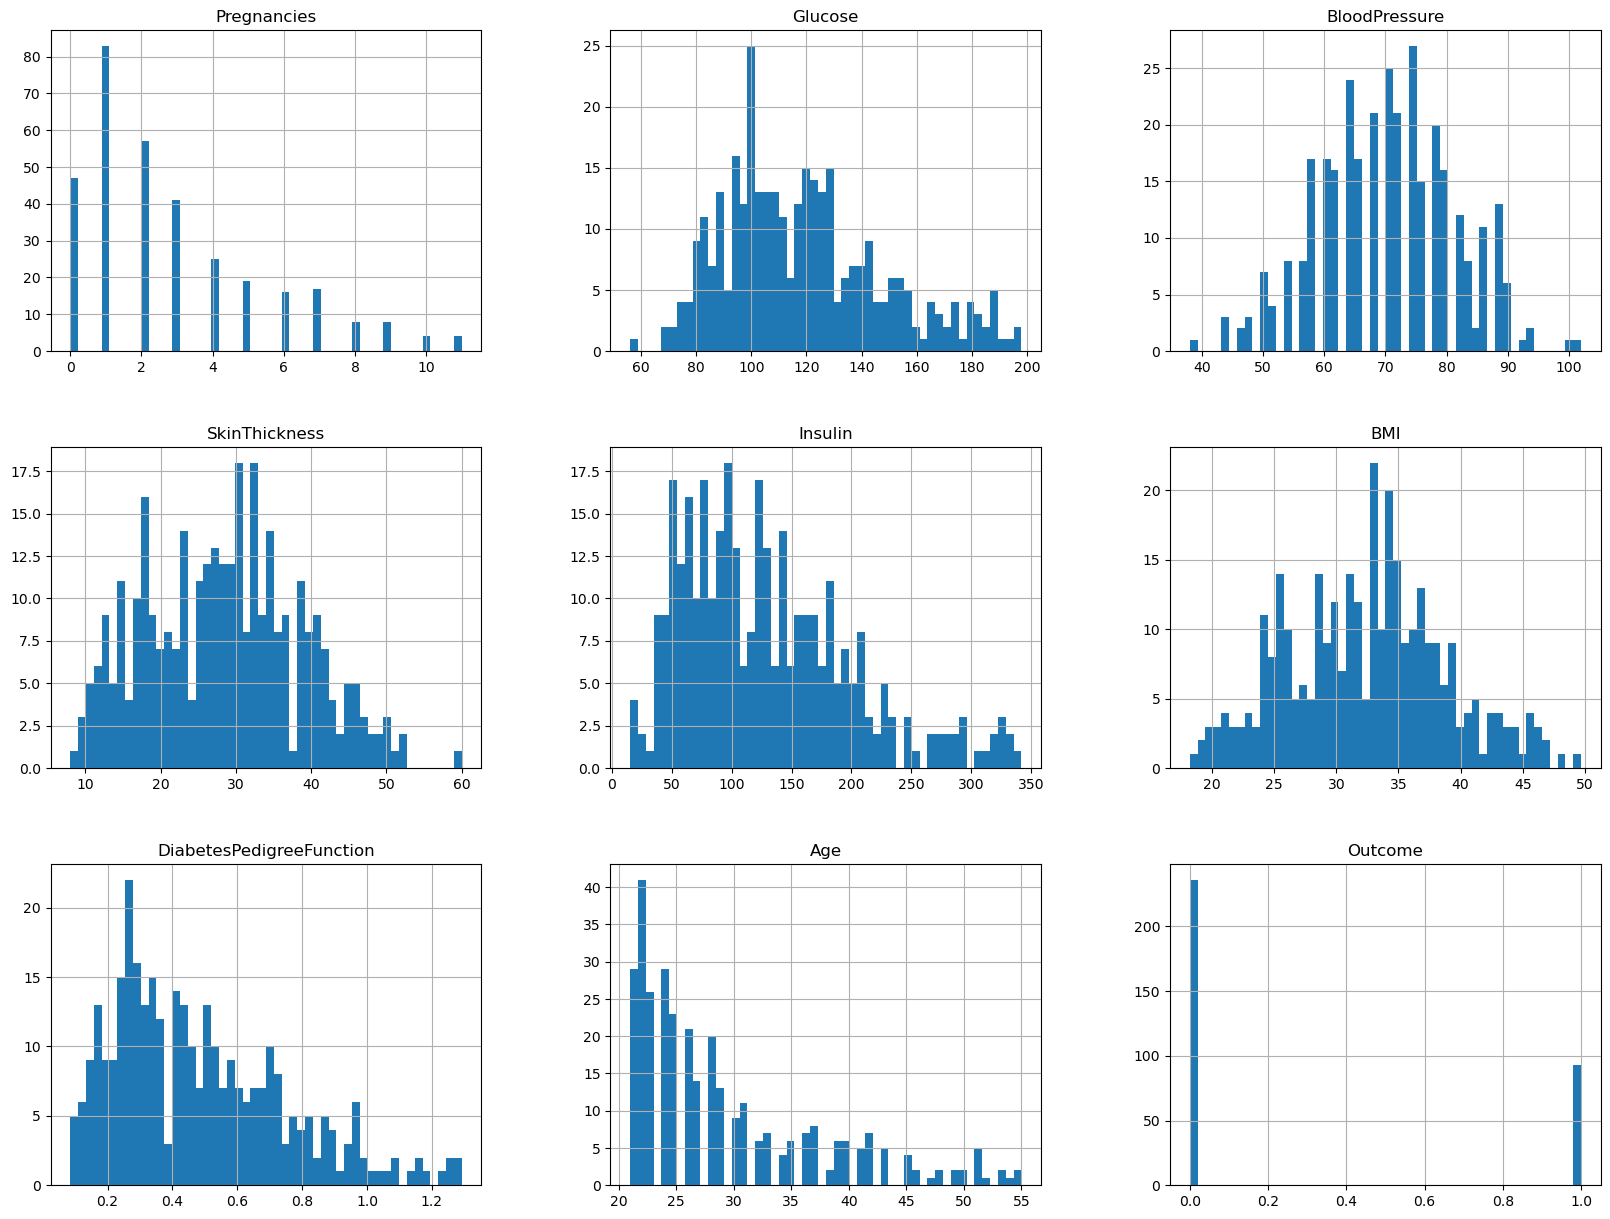

In [598]:
#Melakukan Univariate Analysis pada semua kolom
df_dataset.hist(bins=50, figsize=(20, 15))
plt.show()

***Exploratory Data Analysis - Multivariate Analysis***

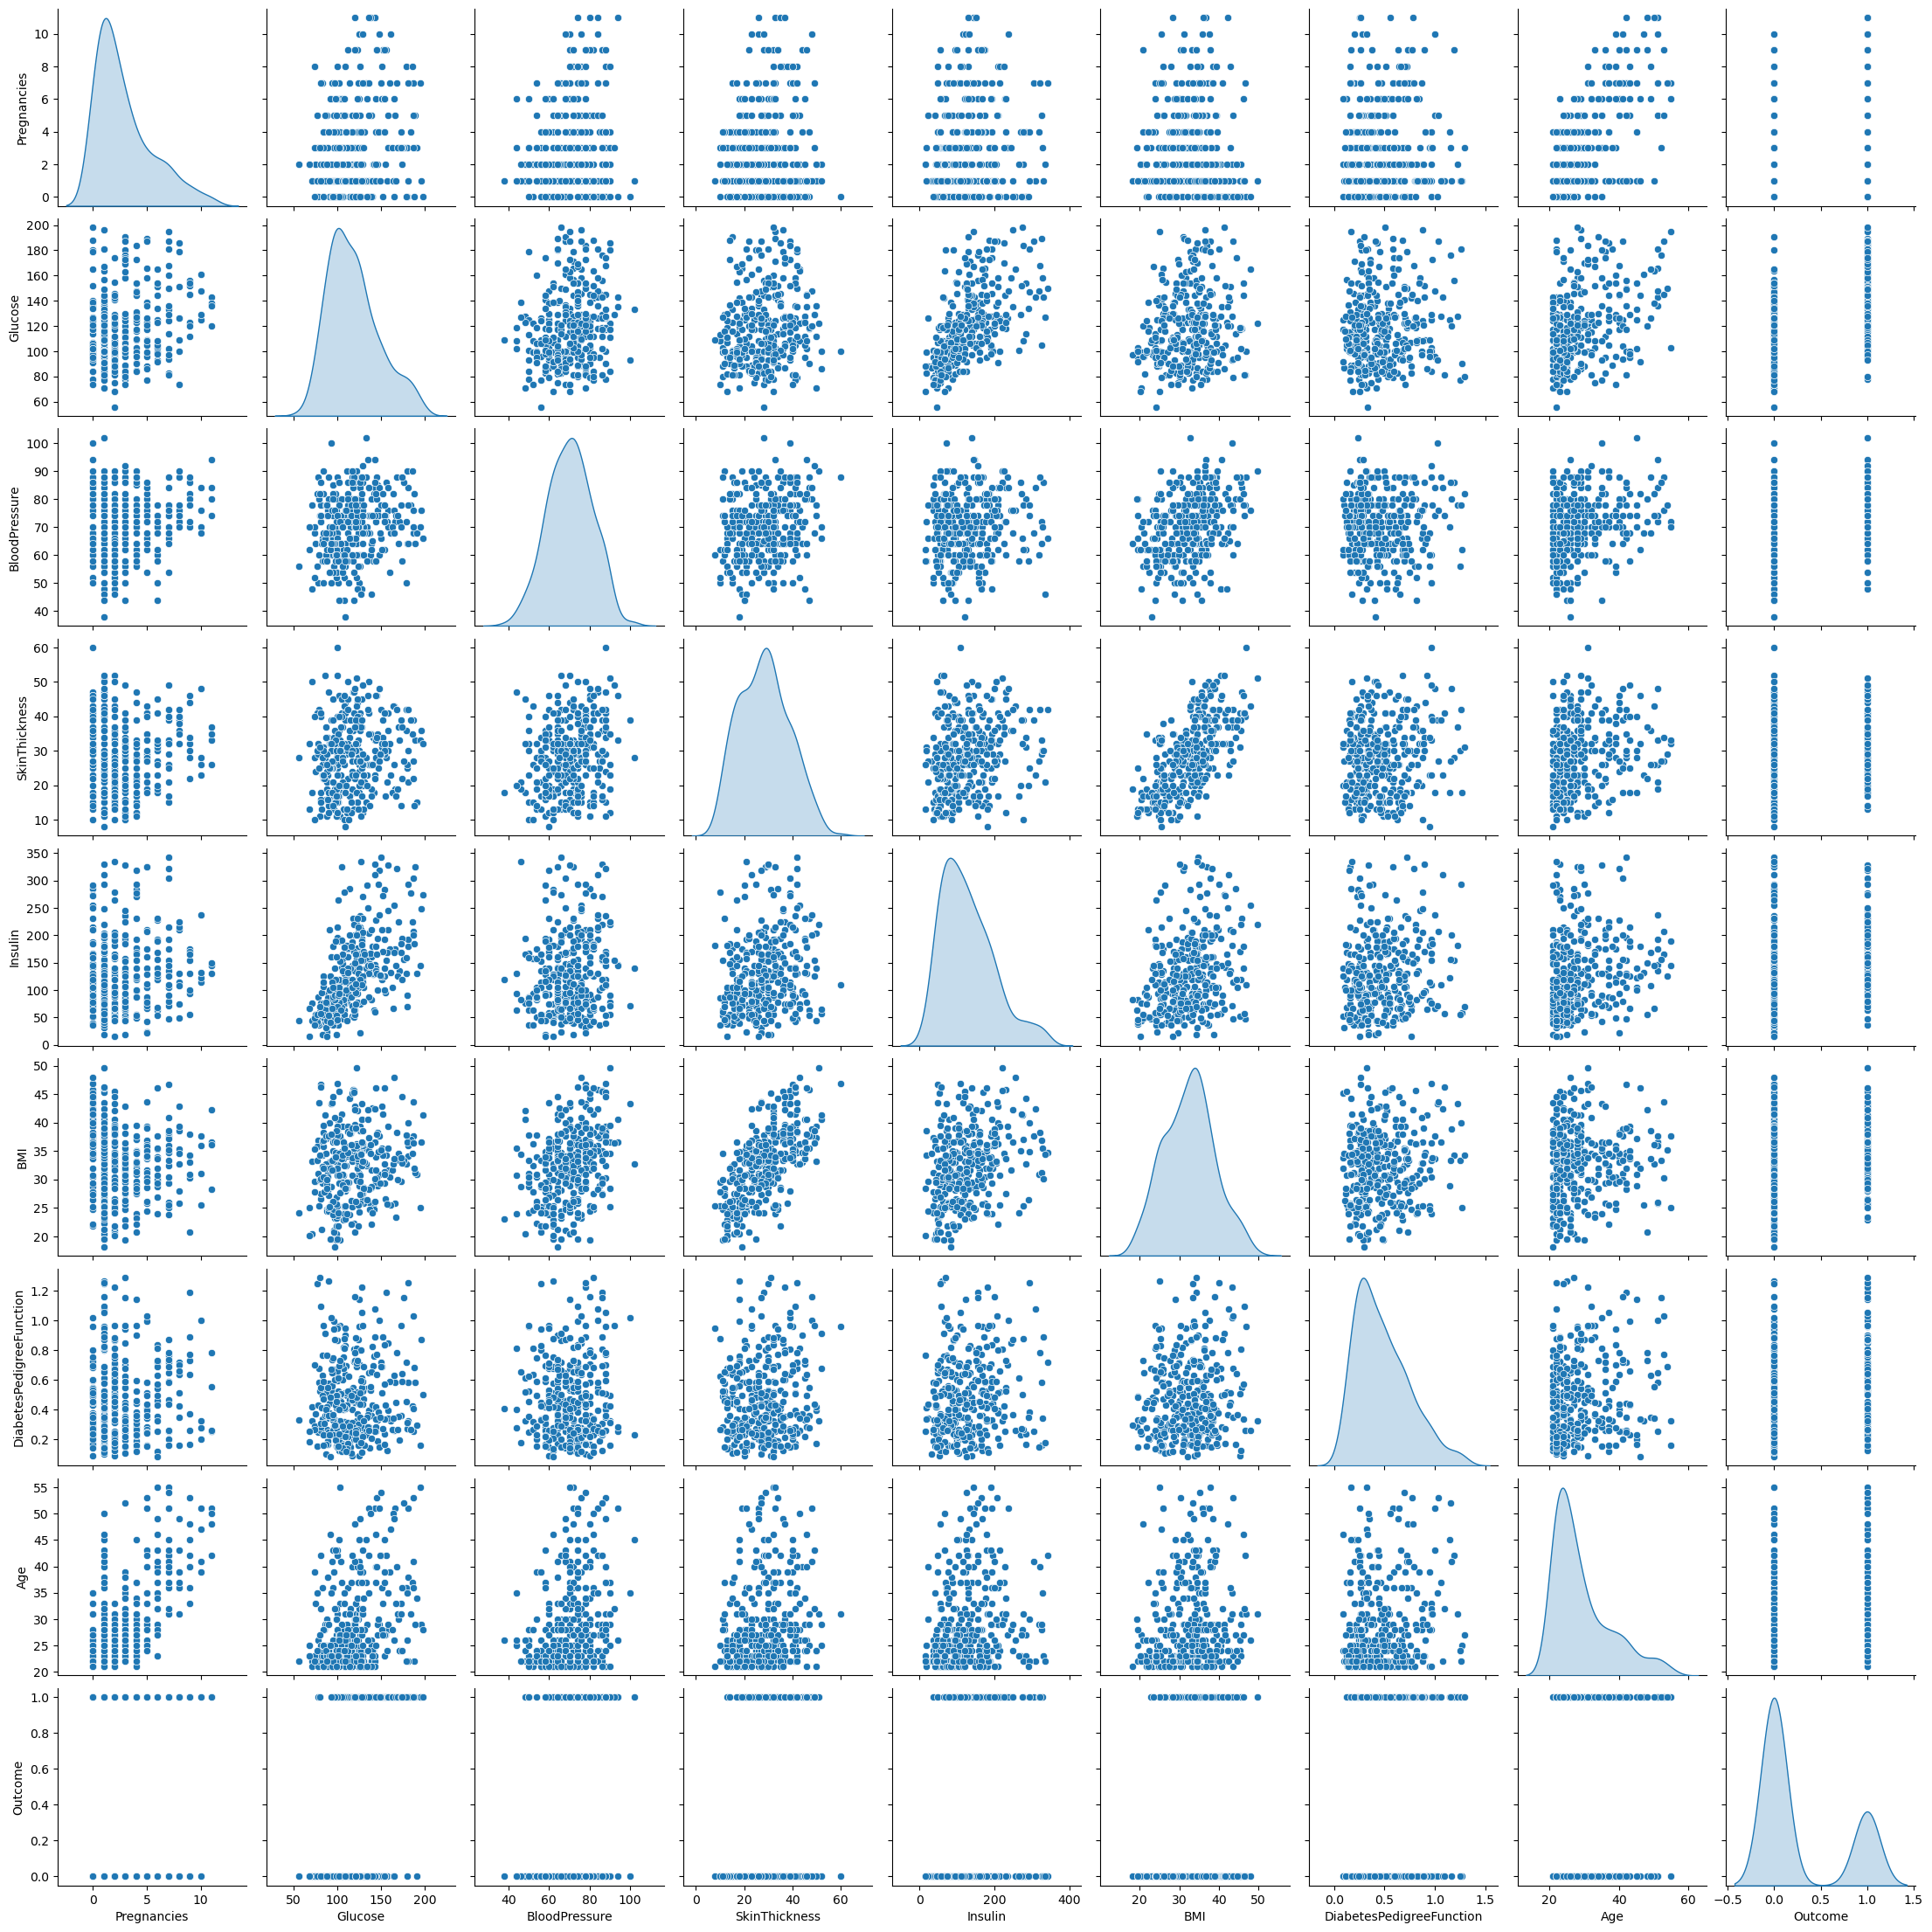

In [599]:
# MElakuakn pengecekan hubungan antar variabel
sns.pairplot(df_dataset, diag_kind='kde')

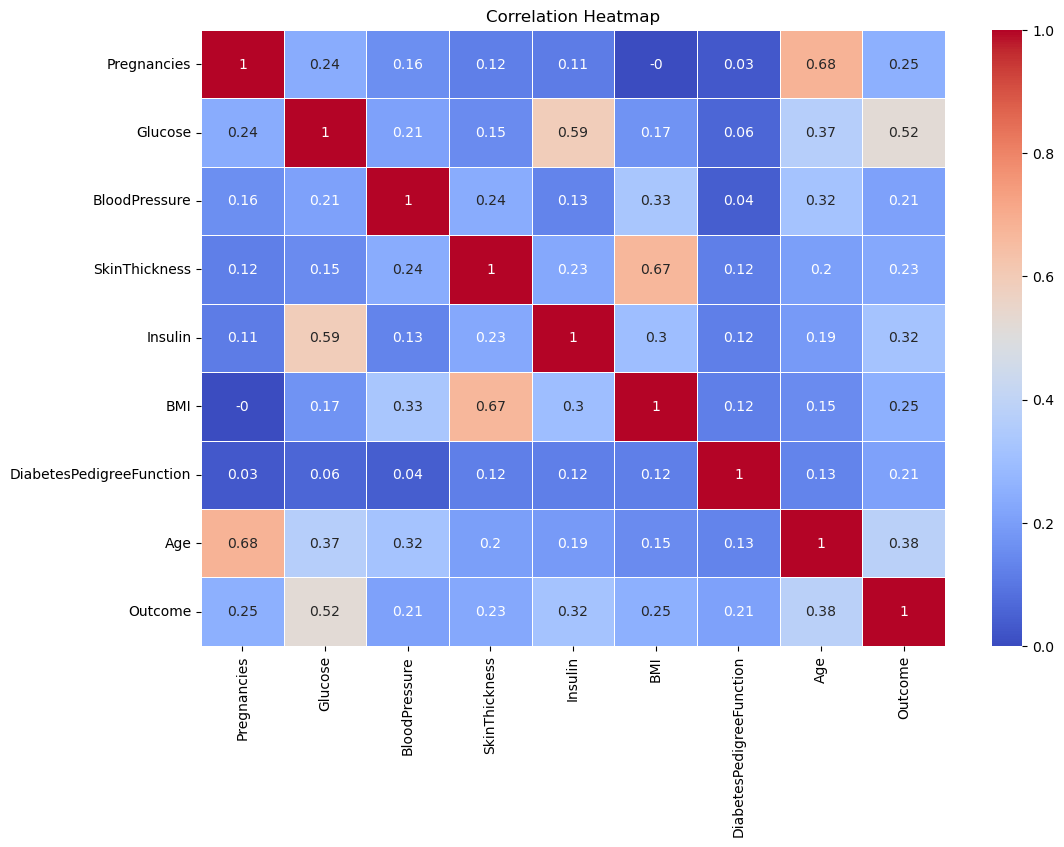

In [600]:
# Menggunakan heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(12, 8))
correlation_matrix = df_dataset.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

***Data Preparation***

In [601]:
# Kita akan melakukan preparasi data untuk model machine learning nantinya dengan tahapan REduksi Dimensi, Pembagian Data,Standarasi data
# Melakukan reduksi dimensi dengan PCA
pca = PCA(n_components=5,random_state=42)
pca.fit(df_dataset[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']])
princ_components = pca.transform(df_dataset[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']])
pca.explained_variance_ratio_.round(3)

array([0.894, 0.089, 0.01 , 0.006, 0.001])

In [602]:
#Mereduksi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2, random_state=42)
pca.fit(df_dataset[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']])
df_dataset[['dimension1', 'dimension2']] = pca.transform(df_dataset[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']])
df_dataset.drop(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], axis=1, inplace=True)
df_dataset.head()

,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Outcome,dimension1,dimension2
0,66,23,0.167,0,-41.546610,-20.278172
1,50,32,0.248,1,-49.994885,-28.584813
2,72,19,0.587,1,57.375455,36.023034
3,84,47,0.551,1,97.927466,-27.075419
4,70,30,0.529,1,-32.391202,5.377606


In [603]:
#split data menjadi data latih dan data uji
x = df_dataset.drop('Outcome', axis=1)
y = df_dataset['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Cek ukuran data latih dan data uji
print(f"Ukuran data latih: {x_train.shape}, Ukuran data uji: {x_test.shape}")

Ukuran data latih: (263, 5), Ukuran data uji: (66, 5)


In [604]:
# Melakukan Standarisasi data
# Scaling semua kolom numerik (setelah PCA)
numeric_cols = x_train.select_dtypes(include=[np.number]).columns
scaler_all = StandardScaler()
scaler_all.fit(x_train[numeric_cols])
x_train[numeric_cols] = scaler_all.transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler_all.transform(x_test[numeric_cols])

***Model Development***

***MEALAKUKAN IMBALANCING***

In [605]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

In [606]:
#Modelling dengan KNN, Random Forest, dan Boosting
knn_bal = KNeighborsClassifier(n_neighbors=12)
knn_bal.fit(x_train_bal, y_train_bal)

rf_bal = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, n_jobs=-1)
rf_bal.fit(x_train_bal, y_train_bal)

boosting_bal = AdaBoostClassifier(learning_rate=0.1, random_state=42, algorithm="SAMME")
boosting_bal.fit(x_train_bal, y_train_bal)
#Meyimpan model ke dalam dictionary
models_bal = {
    'KNN_bal': knn_bal,
    'Random Forest_bal': rf_bal,
    'Boosting_bal': boosting_bal
}

***MELAKUKAN EVALUASI MODEL***

In [607]:
# --- Evaluasi Model Balancing ---
from sklearn.metrics import classification_report, mean_squared_error

for model_name, model in models_bal.items():
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, model.predict(x_test)))

Classification Report for KNN_bal:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76        40
           1       0.63      0.85      0.72        26

    accuracy                           0.74        66
   macro avg       0.75      0.76      0.74        66
weighted avg       0.78      0.74      0.75        66

Classification Report for Random Forest_bal:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.64      0.69      0.67        26

    accuracy                           0.73        66
   macro avg       0.72      0.72      0.72        66
weighted avg       0.73      0.73      0.73        66

Classification Report for Boosting_bal:
              precision    recall  f1-score   support

           0       0.80      0.60      0.69        40
           1       0.56      0.77      0.65        26

    accuracy                           0.67        66
   macro

In [608]:
# --- Threshold Adjustment pada Random Forest Balancing ---
y_proba_rf_bal = rf_bal.predict_proba(x_test)[:, 1]
# Contoh threshold 0.3
y_pred_rf_bal_thresh_0_5 = (y_proba_rf_bal >= 0.5).astype(int)
print("Classification Report for Random Forest_bal (threshold=0.5):")
print(classification_report(y_test, y_pred_rf_bal_thresh_0_5))

Classification Report for Random Forest_bal (threshold=0.5):
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.64      0.69      0.67        26

    accuracy                           0.73        66
   macro avg       0.72      0.72      0.72        66
weighted avg       0.73      0.73      0.73        66



In [609]:
# --- Visualisasi MSE Model Balancing & Threshold Adjustment ---
mse_bal = pd.DataFrame(columns=['train_mse', 'test_mse'],
                       index=['KNN_bal', 'Random Forest_bal', 'Boosting_bal'])
for model_name, model in models_bal.items():
    mse_bal.loc[model_name, 'train_mse'] = mean_squared_error(y_train, model.predict(x_train))
    mse_bal.loc[model_name, 'test_mse'] = mean_squared_error(y_test, model.predict(x_test))

mse_bal.loc['Random Forest (thresh=0.5)', 'test_mse'] = mean_squared_error(y_test, y_pred_rf_bal_thresh_0_5)

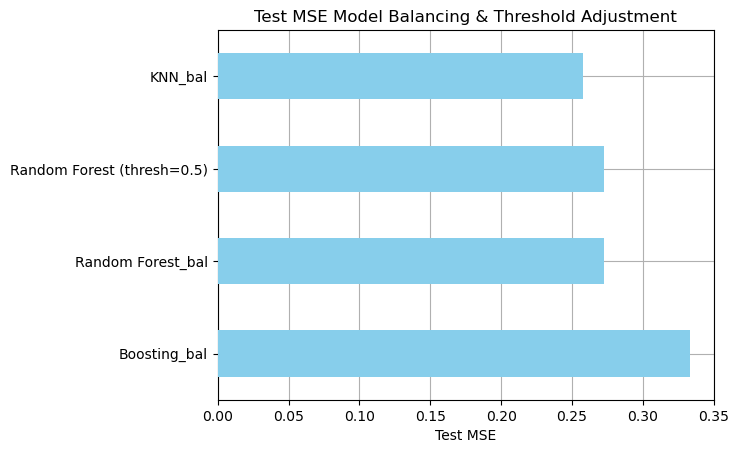

In [610]:
fig, ax = plt.subplots()
mse_bal['test_mse'].sort_values(ascending=False).plot(kind='barh', ax=ax, zorder=3, color='skyblue')
ax.set_title('Test MSE Model Balancing & Threshold Adjustment')
ax.set_xlabel('Test MSE')
ax.grid(zorder=0)
plt.show()

In [611]:
# --- Prediksi untuk semua Data pada Data Uji ---
prediksi = x_test.copy()
pred_dict_bal = {'y_true': y_test.values}
for name, model in models_bal.items():
    pred_dict_bal['prediksi_' + name] = model.predict(prediksi).round(1)
# Threshold adjustment pada Random Forest balancing (threshold 0.3)
y_proba_rf_bal_10 = rf_bal.predict_proba(prediksi)[:, 1]
pred_dict_bal['prediksi_RF_bal_thresh_0.5'] = (y_proba_rf_bal_10 >= 0.5).astype(int)

hasil_prediksi_10 = pd.DataFrame(pred_dict_bal, index=prediksi.index)
print("Prediksi 10 data pertama pada data uji:")
print(hasil_prediksi_10)

# --- Hitung Rasio Akurasi pada 10 Data Pertama ---
def calculate_accuracy_ratio(predictions, actual):
    correct_predictions = (predictions == actual).sum()
    total_predictions = len(predictions)
    accuracy_ratio = (correct_predictions / total_predictions) * 100
    return accuracy_ratio

for col in hasil_prediksi_10.columns[1:]:
    acc = calculate_accuracy_ratio(hasil_prediksi_10[col], hasil_prediksi_10['y_true'])
    print(f"Akurasi {col}: {acc:.2f}%")

Prediksi 10 data pertama pada data uji:
     y_true  prediksi_KNN_bal  prediksi_Random Forest_bal  \
9         1                 1                           1   
164       0                 1                           0   
139       0                 0                           0   
46        0                 1                           1   
94        0                 0                           0   
..      ...               ...                         ...   
173       1                 1                           1   
172       0                 0                           0   
250       0                 1                           1   
60        0                 0                           0   
274       1                 1                           0   

     prediksi_Boosting_bal  prediksi_RF_bal_thresh_0.5  
9                        1                           1  
164                      1                           0  
139                      0                           0  